# Visualización siguiendo la hipótesis: **2020 y la categoría ONLINE**

In [8]:
import sqlite3
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import re
import plotly.express as px
cnx = sqlite3.connect(':memory:')

df = pd.read_csv("../data/casa-encendida/casa_enc_sep.csv")
df.head()
df.to_sql('casaenc3', con= cnx,if_exists='append',index=False)
def sql_query(query):
    return pd.read_sql(query,cnx)


## Ordenamos las categorías y su aparición por años

,Year,Category,Value
103,2023,CINE,40
104,2023,ENCUENTROS,22
105,2023,ESCÉNICAS,12
106,2023,ONLINE,9
107,2023,ESCOLARES,7
108,2023,CONCIERTOS,6
109,2023,EXPOSICIONES,3
110,2023,EN FAMILIA,1
111,2023,PRESENTACIONES,1


<Figure size 3000x1000 with 0 Axes>

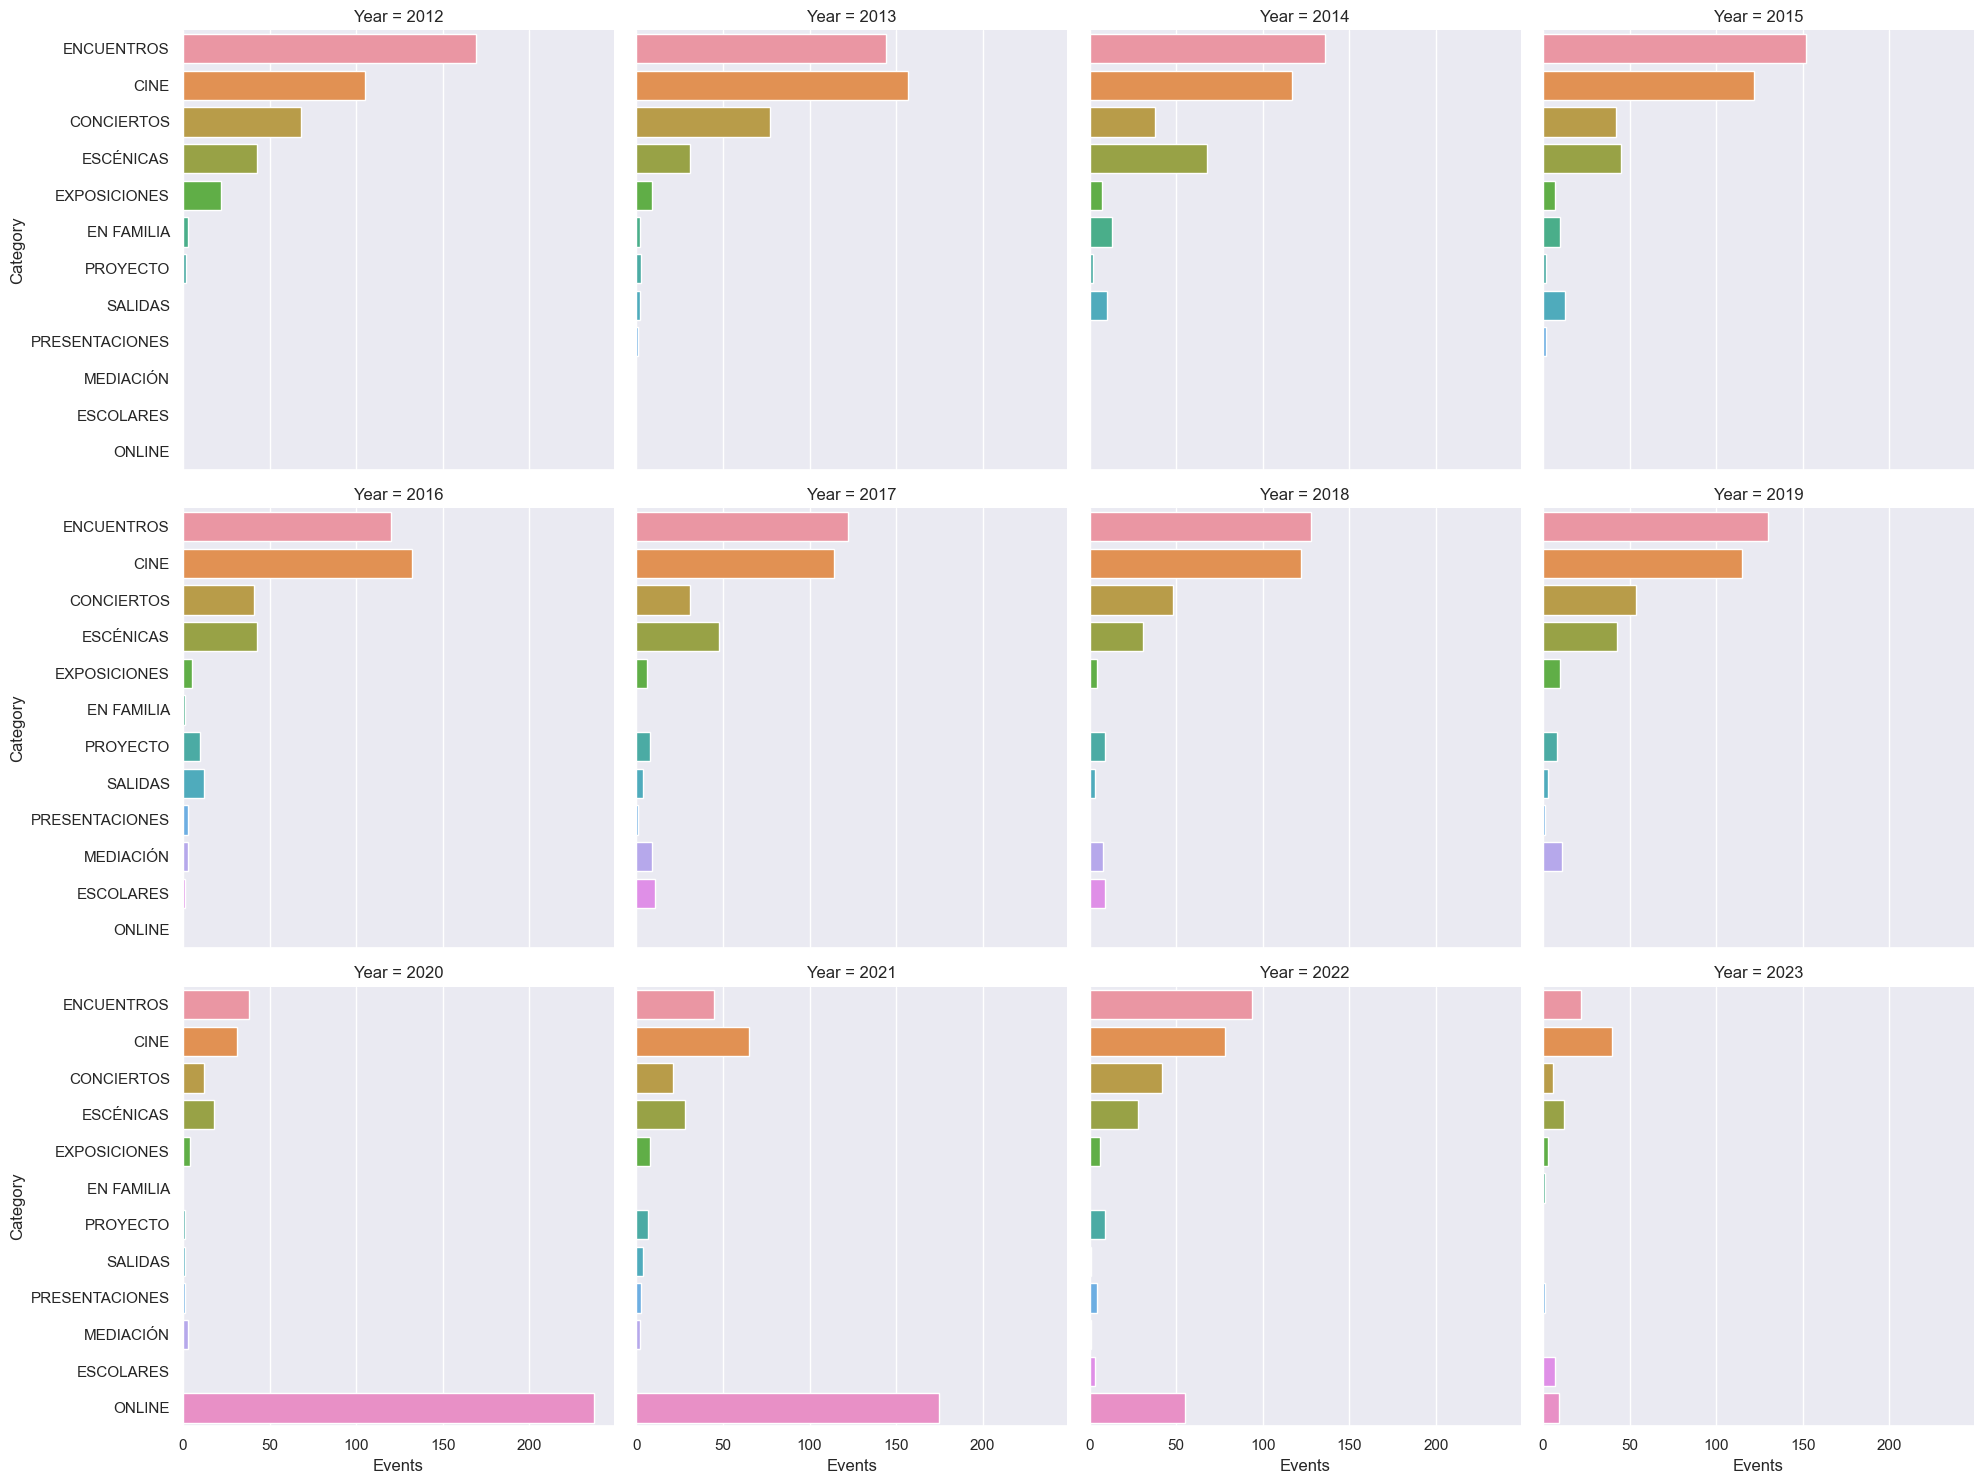

In [21]:
df_casa = pd.read_csv("../data/casa-encendida/casa_enc_sep.csv",index_col=0).drop("Unnamed: 0",axis=1)
years = range(2012,2024)
cat_list = []
for i in years:
    df_casa_yea = df_casa[df_casa.year == i]
    df_casa_year = df_casa_yea.groupby("category1").count().sort_values("title",ascending=False)
    
    for j in df_casa_year.index:
        cat_dict = {}
        cat_dict["Year"]= i
        cat_dict["Category"] = j
        cat_dict["Value"] = df_casa_year["title"][j]
        cat_list.append(cat_dict)
cat_df = pd.DataFrame(cat_list)
plt.figure(figsize=(30,10));
sns.catplot(x="Value",
            y="Category",
            col="Year",
            col_wrap=4,
            data=cat_df,
            kind="bar",orient="h").set(xlabel='Events');
cat_df[cat_df["Year"] == 2023]


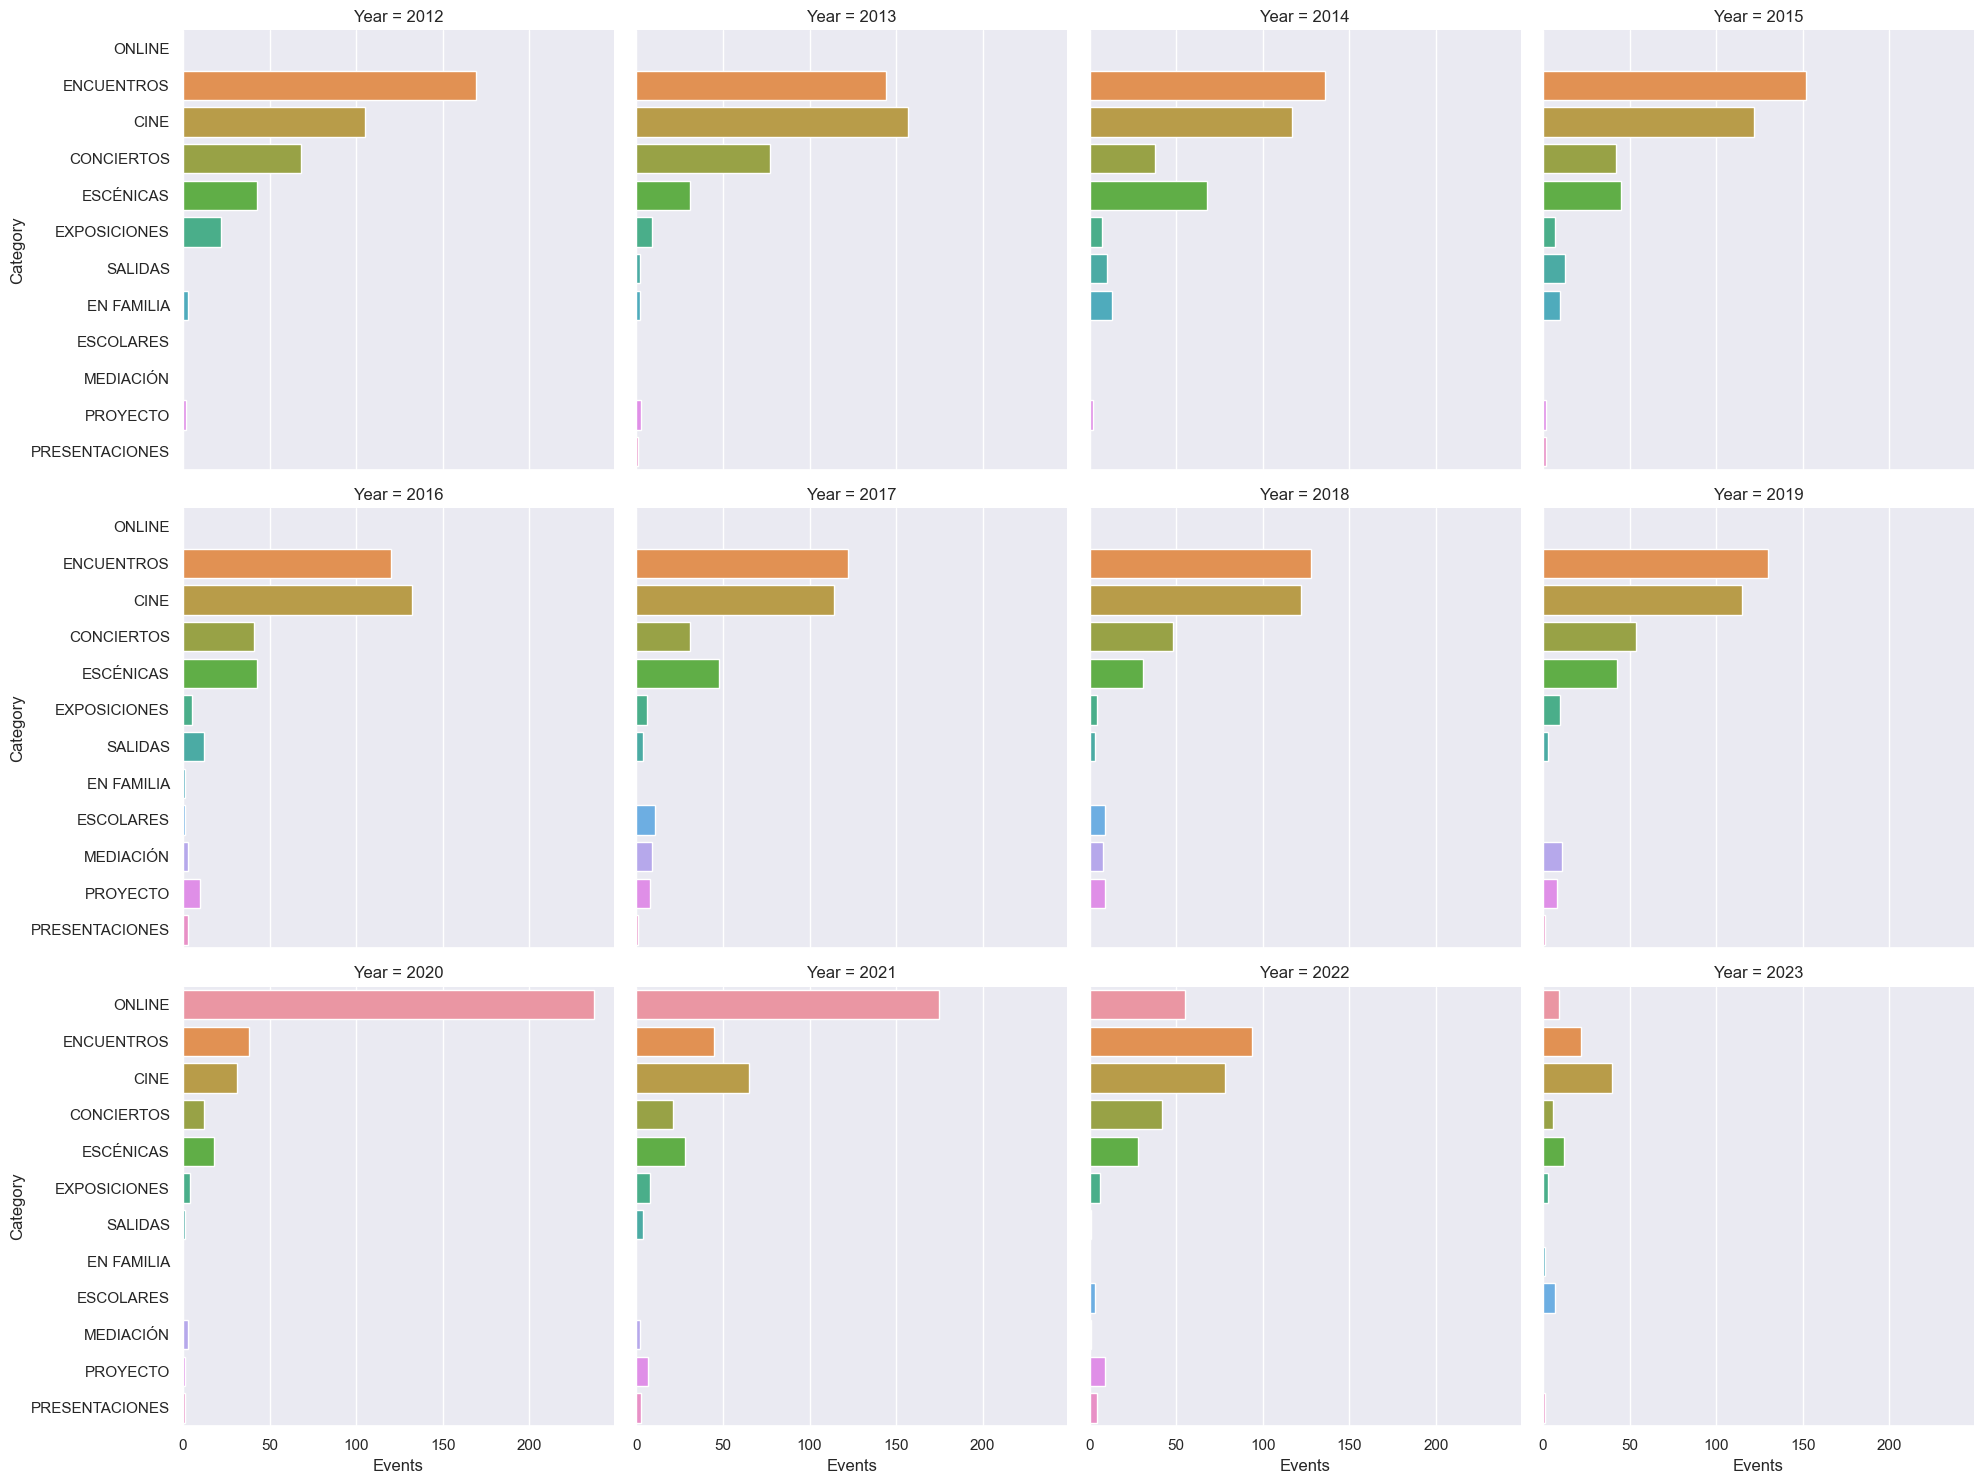

In [20]:
cat_df_ord = cat_df.sort_values("Value",ascending=False)
sns.catplot(x="Value",
            y="Category",
            col="Year",
            col_wrap=4,
            data=cat_df_ord,
            kind="bar",orient="h").set(xlabel='Events');

## Visualizamos la evolución de la categoría ONLINE

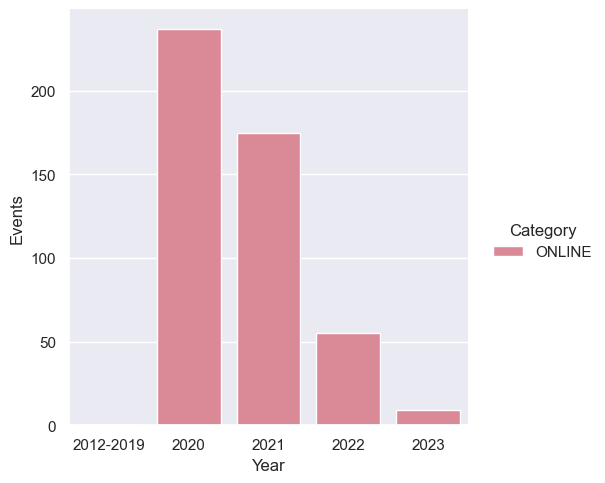

In [42]:
cat_e = cat_df.query("Category == 'ONLINE'")
list_vacio = [{"Year":"2012-2019","Category":"ONLINE","Value":0}]
df_vacio = pd.DataFrame(list_vacio)
online_df = pd.concat([df_vacio,cat_e])
online_df.to_csv("../data/casa-encendida/online.csv")
sns.set(font_scale = 1)
by_month = sns.catplot(x="Year",
            y="Value",
            data=online_df,
            kind="bar",
            hue = "Category",
            palette=["#e77c8d"],
            dodge=False,sharex=False).set(ylabel='Events');
by_month.tight_layout()

In [12]:
df_2020 = cat_df[cat_df["Year"] == 2020]
df_2020


,Year,Category,Value
72,2020,ONLINE,237
73,2020,ENCUENTROS,38
74,2020,CINE,31
75,2020,ESCÉNICAS,18
76,2020,CONCIERTOS,12
77,2020,EXPOSICIONES,4
78,2020,MEDIACIÓN,3
79,2020,PRESENTACIONES,1
80,2020,PROYECTO,1
81,2020,SALIDAS,1


In [13]:
online_df

,Year,Category,Value
0,2012-2019,ONLINE,0
72,2020,ONLINE,237
82,2021,ONLINE,175
94,2022,ONLINE,55
106,2023,ONLINE,9


## Visualizamos el Porcentaje de eventos que han sido online:

In [24]:
# Porcentaje de eventos que han sido online:

eventos_tot = [346,358,321,101]
online_percent = online_df.copy()


percent_2020_int = cat_df[(cat_df["Year"] == 2020) & (cat_df["Category"] == "ONLINE")]["Value"].iloc[0]/eventos_tot[0]*100
percent_2020_str = ("%.2f" % percent_2020_int)+"%"
percent_2021_int = cat_df[(cat_df["Year"] == 2021) & (cat_df["Category"] == "ONLINE")]["Value"].iloc[0]/eventos_tot[1]*100
percent_2021_str = ("%.2f" % percent_2021_int)+"%"
percent_2022_int = cat_df[(cat_df["Year"] == 2022) & (cat_df["Category"] == "ONLINE")]["Value"].iloc[0]/eventos_tot[2]*100
percent_2022_str = ("%.2f" % percent_2022_int)+"%"
percent_2023_int = cat_df[(cat_df["Year"] == 2023) & (cat_df["Category"] == "ONLINE")]["Value"].iloc[0]/eventos_tot[3]*100
percent_2023_str = ("%.2f" % percent_2023_int)+"%"
#percent_2020 = (cat_df[cat_df["Year"] == 2020 & cat_df["Category"] == "ONLINE"]["Value"]/eventos_tot)*100
list_percent= ["0%",percent_2020_str,percent_2021_str,percent_2022_str,percent_2023_str]
list_percent
online_percent["Percentage"]=list_percent

fig = px.bar(online_percent, x='Year', y='Value',color="Category",hover_data=["Percentage"])
fig.update_xaxes(type="category")
fig.update_layout(yaxis_title ="Events")
fig.show()

#fig.write_html("../img/percentageonline.html")
online_percent

,Year,Category,Value,Percentage
0,2012-2019,ONLINE,0,0%
72,2020,ONLINE,237,68.50%
82,2021,ONLINE,175,48.88%
94,2022,ONLINE,55,17.13%
106,2023,ONLINE,9,8.91%


In [41]:
cat_df_redu = cat_df.copy()
cat_df_redu= cat_df_redu.query("Value > 10 | Category == 'ONLINE'")
fig = px.bar(cat_df_redu, x='Year', y='Value',color="Category")
fig.update_xaxes(type="category")
fig.update_layout(yaxis_title ="Events")
fig.show()
#fig.write_html("../img/categorias_colores.html")